In [ ]:
version


               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          3                           
minor          6.3                         
year           2020                        
month          02                          
day            29                          
svn rev        77875                       
language       R                           
version.string R version 3.6.3 (2020-02-29)
nickname       Holding the Windsock        

# Survival Analysis Basics

**Survival analysis** corresponds to a set of statistical approaches used to investigate the time it takes for an event of interest to occur.

Survival analysis is used in a variety of field such as:

* Cancer studies for patients survival time analyses,
* Sociology for “event-history analysis”,
* and in engineering for “failure-time analysis”.

In cancer studies, typical research questions are like:

* What is the impact of certain clinical characteristics on patient’s survival
* What is the probability that an individual survives 3 years?
* Are there differences in survival between groups of patients?

**Survival time and type of events in cancer studies**

There are different types of events, including:

* Relapse
* Progression
* Death

The time from ‘response to treatment’ (complete remission) to the occurrence of the event of interest is commonly called survival time (or time to event).

The two most important measures in cancer studies include: i) the time to death; and ii) the relapse-free survival time, which corresponds to the time between response to treatment and recurrence of the disease. It’s also known as disease-free survival time and event-free survival time.

**Censoring**

As mentioned above, survival analysis focuses on the expected duration of time until occurrence of an event of interest (relapse or death). However, the event may not be observed for some individuals within the study time period, producing the so-called censored observations.

Censoring may arise in the following ways:

1. a patient has not (yet) experienced the event of interest, such as relapse or death, within the study time period;
2. a patient is lost to follow-up during the study period;
3. a patient experiences a different event that makes further follow-up impossible.

This type of censoring, named right censoring, is handled in survival analysis.

**Survival and hazard functions**

Two related probabilities are used to describe survival data: the survival probability and the hazard probability.

The survival probability, also known as the survivor function S(t), is the probability that an individual survives from the time origin (e.g. diagnosis of cancer) to a specified future time t.

The hazard, denoted by h(t), is the probability that an individual who is under observation at a time t has an event at that time.

Note that, in contrast to the survivor function, which focuses on not having an event, the hazard function focuses on the event occurring.

**Kaplan-Meier survival estimate**

The Kaplan-Meier (KM) method is a non-parametric method used to estimate the survival probability from observed survival times (Kaplan and Meier, 1958).

The survival probability at time ti, S(ti), is calculated as follow:

$S(t_i) = S(t_{i-1})(1-\frac{d_i}{n_i})$


Where,

* S(ti−1) = the probability of being alive at ti−1
* ni = the number of patients alive just before ti
* di = the number of events at ti
* t0 = 0, S(0) = 1

The estimated probability (S(t)) is a step function that changes value only at the time of each event. It’s also possible to compute confidence intervals for the survival probability.

The KM survival curve, a plot of the KM survival probability against time, provides a useful summary of the data that can be used to estimate measures such as median survival time.

In [1]:
install.packages(c("survival", "survminer"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘exactRankTests’, ‘mvtnorm’, ‘KMsurv’, ‘data.table’, ‘zoo’, ‘km.ci’, ‘xtable’, ‘ggpubr’, ‘gridExtra’, ‘maxstat’, ‘survMisc’




In [2]:
library("survival")
library("survminer")

Loading required package: ggplot2

Loading required package: ggpubr



In [3]:
# example lung cancer data set
data("lung")
head(lung)

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,306,2,74,1,1,90,100,1175,NA
2,3,455,2,68,1,0,90,90,1225,15
3,3,1010,1,56,1,0,90,90,NA,15
4,5,210,2,57,1,1,90,60,1150,11
5,1,883,2,60,1,0,100,90,NA,0
6,12,1022,1,74,1,1,50,80,513,0


* inst: Institution code
* time: Survival time in days
* status: censoring status 1=censored, 2=dead
* age: Age in years
* sex: Male=1 Female=2
* ph.ecog: ECOG performance score (0=good 5=dead)
* ph.karno: Karnofsky performance score (bad=0-good=100) rated by physician
* pat.karno: Karnofsky performance score as rated by patient
* meal.cal: Calories consumed at meals
* wt.loss: Weight loss in last six months

The function survfit() [in survival package] can be used to compute kaplan-Meier survival estimate. Its main arguments include:

* a survival object created using the function Surv()
* and the data set containing the variables.

To compute survival curves, type this:

In [4]:
fit <- survfit(Surv(time, status) ~ sex, data = lung)
print(fit)

Call: survfit(formula = Surv(time, status) ~ sex, data = lung)

        n events median 0.95LCL 0.95UCL
sex=1 138    112    270     212     310
sex=2  90     53    426     348     550


By default, the function print() shows a short summary of the survival curves. It prints the number of observations, number of events, the median survival and the confidence limits for the median.

In [5]:
# Summary of survival curves
summary(fit)
# Access to the sort summary table
summary(fit)$table

Call: survfit(formula = Surv(time, status) ~ sex, data = lung)

                sex=1 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   11    138       3   0.9783  0.0124       0.9542        1.000
   12    135       1   0.9710  0.0143       0.9434        0.999
   13    134       2   0.9565  0.0174       0.9231        0.991
   15    132       1   0.9493  0.0187       0.9134        0.987
   26    131       1   0.9420  0.0199       0.9038        0.982
   30    130       1   0.9348  0.0210       0.8945        0.977
   31    129       1   0.9275  0.0221       0.8853        0.972
   53    128       2   0.9130  0.0240       0.8672        0.961
   54    126       1   0.9058  0.0249       0.8583        0.956
   59    125       1   0.8986  0.0257       0.8496        0.950
   60    124       1   0.8913  0.0265       0.8409        0.945
   65    123       2   0.8768  0.0280       0.8237        0.933
   71    121       1   0.8696  0.0287       0.8152        0.928
   81    120     

,records,n.max,n.start,events,*rmean,*se(rmean),median,0.95LCL,0.95UCL
sex=1,138,138,138,112,326.0841,22.91156,270,212,310
sex=2,90,90,90,53,460.6473,34.68985,426,348,550


In [6]:
d <- data.frame(time = fit$time,
                  n.risk = fit$n.risk,
                  n.event = fit$n.event,
                  n.censor = fit$n.censor,
                  surv = fit$surv,
                  upper = fit$upper,
                  lower = fit$lower
                  )
head(d)

,time,n.risk,n.event,n.censor,surv,upper,lower
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,11,138,3,0,0.9782609,1.0000000,0.9542301
2,12,135,1,0,0.9710145,0.9994124,0.9434235
3,13,134,2,0,0.9565217,0.9911586,0.9230952
4,15,132,1,0,0.9492754,0.9866017,0.9133612
5,26,131,1,0,0.9420290,0.9818365,0.9038355
6,30,130,1,0,0.9347826,0.9768989,0.8944820


**Visualize survival curves**

We’ll use the function ggsurvplot() [in Survminer R package] to produce the survival curves for the two groups of subjects.

It’s also possible to show:

* the 95% confidence limits of the survivor function using the argument conf.int = TRUE.
* the number and/or the percentage of individuals at risk by time using the option risk.table. Allowed values for risk.table include:
    * TRUE or FALSE specifying whether to show or not the risk table. Default is FALSE.
    * “absolute” or “percentage”: to show the absolute number and the percentage of subjects at risk by time, respectively. Use “abs_pct” to show both absolute number and percentage.
* the p-value of the Log-Rank test comparing the groups using pval = TRUE.
* horizontal/vertical line at median survival using the argument surv.median.line. Allowed values include one of c(“none”, “hv”, “h”, “v”). v: vertical, h:horizontal.

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


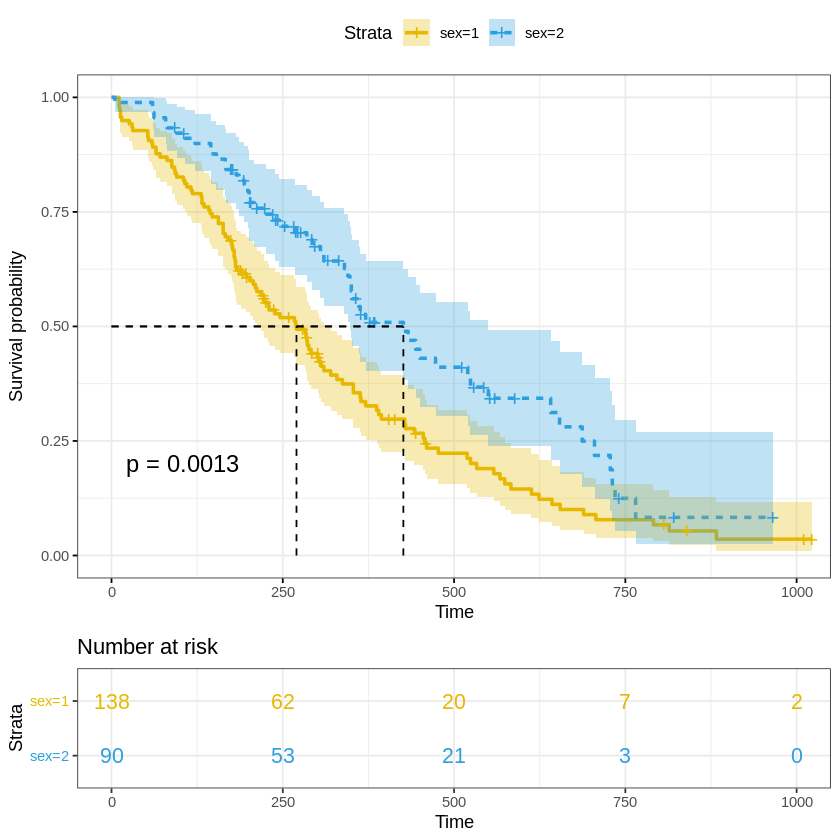

In [7]:
# Change color, linetype by strata, risk.table color by strata
ggsurvplot(fit,
          pval = TRUE, conf.int = TRUE,
          risk.table = TRUE, # Add risk table
          risk.table.col = "strata", # Change risk table color by groups
          linetype = "strata", # Change line type by groups
          surv.median.line = "hv", # Specify median survival
          ggtheme = theme_bw(), # Change ggplot2 theme
          palette = c("#E7B800", "#2E9FDF"))

The plot can be further customized using the following arguments:

* conf.int.style = “step” to change the style of confidence interval bands.
* xlab to change the x axis label.
* break.time.by = 200 break x axis in time intervals by 200.
* risk.table = “abs_pct”to show both absolute number and percentage of individuals at risk.
* risk.table.y.text.col = TRUE and risk.table.y.text = FALSE to provide bars instead of names in text annotations of the legend of risk table.
* ncensor.plot = TRUE to plot the number of censored subjects at time t. As suggested by Marcin Kosinski, This is a good additional feedback to survival curves, so that one could realize: how do survival curves look like, what is the number of risk set AND what is the cause that the risk set become smaller: is it caused by events or by censored events?
* legend.labs to change the legend labels.

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


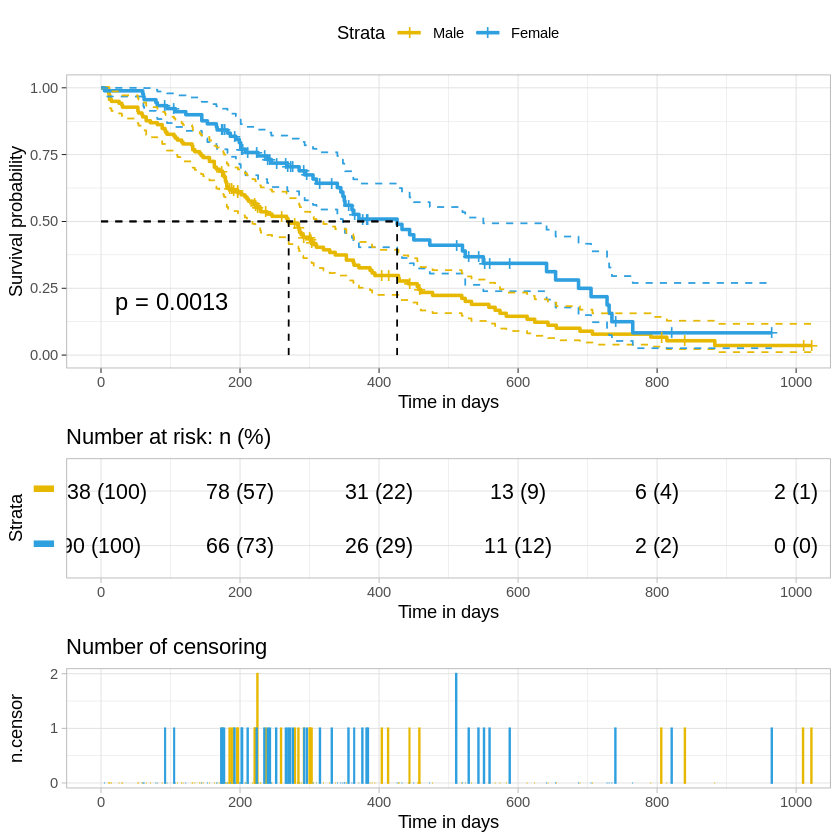

In [8]:
ggsurvplot(
   fit,                     # survfit object with calculated statistics.
   pval = TRUE,             # show p-value of log-rank test.
   conf.int = TRUE,         # show confidence intervals for 
                            # point estimaes of survival curves.
   conf.int.style = "step",  # customize style of confidence intervals
   xlab = "Time in days",   # customize X axis label.
   break.time.by = 200,     # break X axis in time intervals by 200.
   ggtheme = theme_light(), # customize plot and risk table with a theme.
   risk.table = "abs_pct",  # absolute number and percentage at risk.
  risk.table.y.text.col = T,# colour risk table text annotations.
  risk.table.y.text = FALSE,# show bars instead of names in text annotations
                            # in legend of risk table.
  ncensor.plot = TRUE,      # plot the number of censored subjects at time t
  surv.median.line = "hv",  # add the median survival pointer.
  legend.labs = 
    c("Male", "Female"),    # change legend labels.
  palette = 
    c("#E7B800", "#2E9FDF") # custom color palettes.
)

The Kaplan-Meier plot can be interpreted as follow:


The horizontal axis (x-axis) represents time in days, and the vertical axis (y-axis) shows the probability of surviving or the proportion of people surviving. The lines represent survival curves of the two groups. A vertical drop in the curves indicates an event. The vertical tick mark on the curves means that a patient was censored at this time.

* At time zero, the survival probability is 1.0 (or 100% of the participants are alive).
* At time 250, the probability of survival is approximately 0.55 (or 55%) for sex=1 and 0.75 (or 75%) for sex=2.
* The median survival is approximately 270 days for sex=1 and 426 days for sex=2, suggesting a good survival for sex=2 compared to sex=1

In [9]:
summary(fit)$table

,records,n.max,n.start,events,*rmean,*se(rmean),median,0.95LCL,0.95UCL
sex=1,138,138,138,112,326.0841,22.91156,270,212,310
sex=2,90,90,90,53,460.6473,34.68985,426,348,550


The median survival times for each group represent the time at which the survival probability, S(t), is 0.5.

The median survival time for sex=1 (Male group) is 270 days, as opposed to 426 days for sex=2 (Female). There appears to be a survival advantage for female with lung cancer compare to male. However, to evaluate whether this difference is statistically significant requires a formal statistical test, a subject that is discussed in the next sections.

The survival curves can be shorten using the argument xlim as follow:

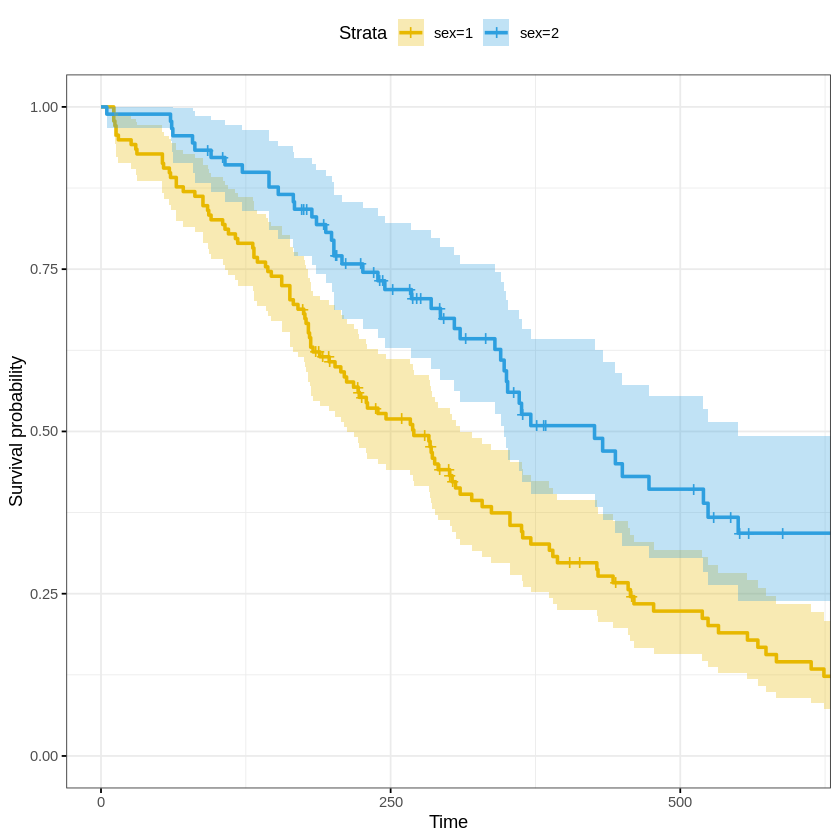

In [10]:
ggsurvplot(fit,
          conf.int = TRUE,
          risk.table.col = "strata", # Change risk table color by groups
          ggtheme = theme_bw(), # Change ggplot2 theme
          palette = c("#E7B800", "#2E9FDF"),
          xlim = c(0, 600))

Note that, three often used transformations can be specified using the argument fun:

* “log”: log transformation of the survivor function,
* “event”: plots cumulative events (f(y) = 1-y). It’s also known as the cumulative incidence,
* “cumhaz” plots the cumulative hazard function (f(y) = -log(y))

For example, to plot cumulative events, type this:

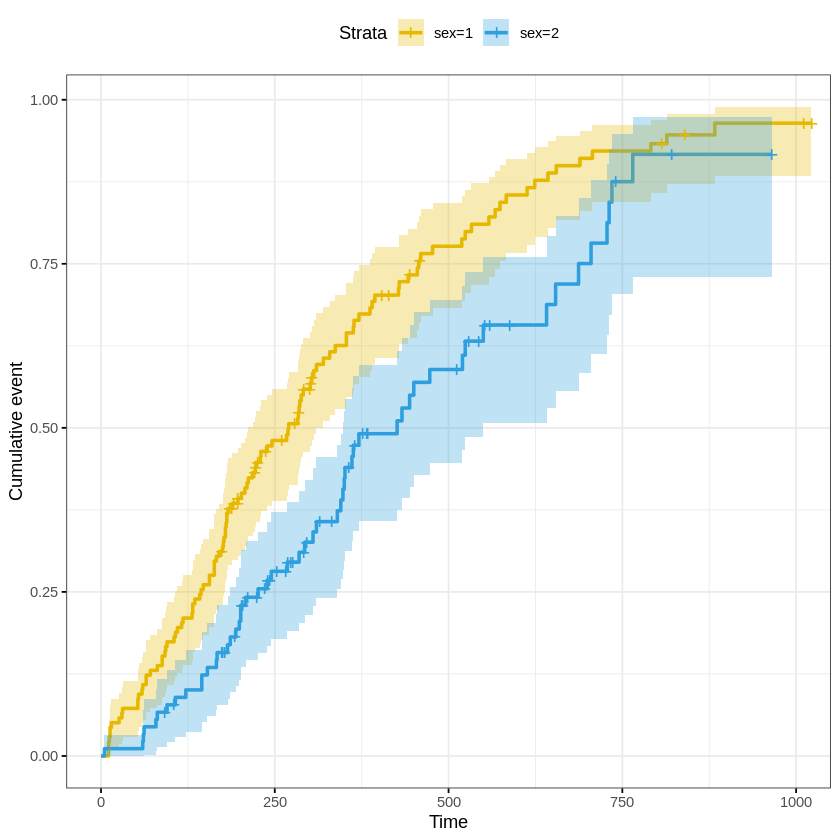

In [11]:
ggsurvplot(fit,
          conf.int = TRUE,
          risk.table.col = "strata", # Change risk table color by groups
          ggtheme = theme_bw(), # Change ggplot2 theme
          palette = c("#E7B800", "#2E9FDF"),
          fun = "event")

The cummulative hazard is commonly used to estimate the hazard probability. It’s defined as H(t)=−log(survivalfunction)=−log(S(t)). The cumulative hazard (H(t)) can be interpreted as the cumulative force of mortality. In other words, it corresponds to the number of events that would be expected for each individual by time t if the event were a repeatable process.

To plot cumulative hazard, type this:

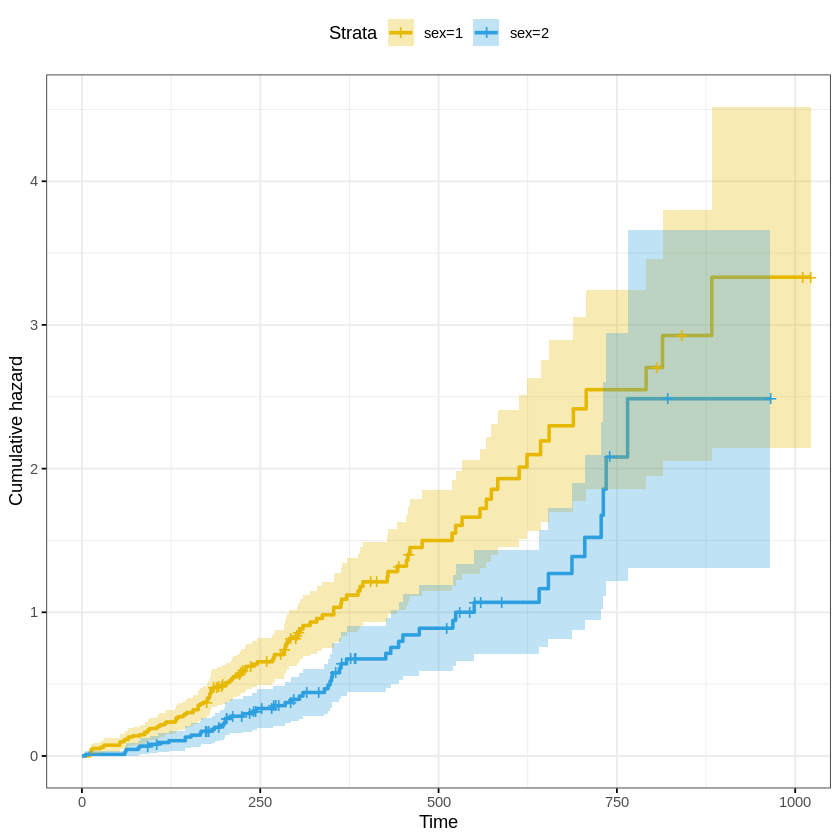

In [12]:
ggsurvplot(fit,
          conf.int = TRUE,
          risk.table.col = "strata", # Change risk table color by groups
          ggtheme = theme_bw(), # Change ggplot2 theme
          palette = c("#E7B800", "#2E9FDF"),
          fun = "cumhaz")

**Kaplan-Meier life table: summary of survival curves**

As mentioned above, you can use the function summary() to have a complete summary of survival curves:

In [13]:
summary(fit)

Call: survfit(formula = Surv(time, status) ~ sex, data = lung)

                sex=1 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   11    138       3   0.9783  0.0124       0.9542        1.000
   12    135       1   0.9710  0.0143       0.9434        0.999
   13    134       2   0.9565  0.0174       0.9231        0.991
   15    132       1   0.9493  0.0187       0.9134        0.987
   26    131       1   0.9420  0.0199       0.9038        0.982
   30    130       1   0.9348  0.0210       0.8945        0.977
   31    129       1   0.9275  0.0221       0.8853        0.972
   53    128       2   0.9130  0.0240       0.8672        0.961
   54    126       1   0.9058  0.0249       0.8583        0.956
   59    125       1   0.8986  0.0257       0.8496        0.950
   60    124       1   0.8913  0.0265       0.8409        0.945
   65    123       2   0.8768  0.0280       0.8237        0.933
   71    121       1   0.8696  0.0287       0.8152        0.928
   81    120     

It’s also possible to use the function surv_summary() [in survminer package] to get a summary of survival curves. Compared to the default summary() function, surv_summary() creates a data frame containing a nice summary from survfit results.

In [14]:
res.sum <- surv_summary(fit)
head(res.sum)

Warning message in .get_data(x, data = data):
“The `data` argument is not provided. Data will be extracted from model fit.”


,time,n.risk,n.event,n.censor,surv,std.err,upper,lower,strata,sex
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,11,138,3,0,0.9782609,0.01268978,1.0000000,0.9542301,sex=1,1
2,12,135,1,0,0.9710145,0.01470747,0.9994124,0.9434235,sex=1,1
3,13,134,2,0,0.9565217,0.01814885,0.9911586,0.9230952,sex=1,1
4,15,132,1,0,0.9492754,0.01967768,0.9866017,0.9133612,sex=1,1
5,26,131,1,0,0.9420290,0.02111708,0.9818365,0.9038355,sex=1,1
6,30,130,1,0,0.9347826,0.02248469,0.9768989,0.8944820,sex=1,1


The function surv_summary() returns a data frame with the following columns:

* time: the time points at which the curve has a step.
* n.risk: the number of subjects at risk at t.
* n.event: the number of events that occur at time t.
* n.censor: number of censored events.
* surv: estimate of survival probability.
* std.err: standard error of survival.
* upper: upper end of confidence interval
* lower: lower end of confidence interval
* strata: indicates stratification of curve estimation. The levels of strata (a factor) are the labels for the curves.

In a situation, where survival curves have been fitted with one or more variables, surv_summary object contains extra columns representing the variables. This makes it possible to facet the output of ggsurvplot by strata or by some combinations of factors.

surv_summary object has also an attribute named ‘table’ containing information about the survival curves, including medians of survival with confidence intervals, as well as, the total number of subjects and the number of event in each curve. To get access to the attribute ‘table’, type this:

In [15]:
attr(res.sum, "table")

,records,n.max,n.start,events,*rmean,*se(rmean),median,0.95LCL,0.95UCL
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sex=1,138,138,138,112,326.0841,22.91156,270,212,310
sex=2,90,90,90,53,460.6473,34.68985,426,348,550


**Log-Rank test comparing survival curves: survdiff()**

The log-rank test is the most widely used method of comparing two or more survival curves. The null hypothesis is that there is no difference in survival between the two groups. The log rank test is a non-parametric test, which makes no assumptions about the survival distributions. Essentially, the log rank test compares the observed number of events in each group to what would be expected if the null hypothesis were true (i.e., if the survival curves were identical). The log rank statistic is approximately distributed as a chi-square test statistic.

The function survdiff() [in survival package] can be used to compute log-rank test comparing two or more survival curves.

survdiff() can be used as follow:

In [16]:
surv_diff <- survdiff(Surv(time, status) ~ sex, data = lung)
surv_diff

Call:
survdiff(formula = Surv(time, status) ~ sex, data = lung)

        N Observed Expected (O-E)^2/E (O-E)^2/V
sex=1 138      112     91.6      4.55      10.3
sex=2  90       53     73.4      5.68      10.3

 Chisq= 10.3  on 1 degrees of freedom, p= 0.001 

The function returns a list of components, including:

* n: the number of subjects in each group.
* obs: the weighted observed number of events in each group.
* exp: the weighted expected number of events in each group.
* chisq: the chisquare statistic for a test of equality.
* strata: optionally, the number of subjects contained in each stratum.

The log rank test for difference in survival gives a p-value of p = 0.001, indicating that the sex groups differ significantly in survival.

** Fit complex survival curves **

In this section, we’ll compute survival curves using the combination of multiple factors. Next, we’ll facet the output of ggsurvplot() by a combination of factors

1. Fit (complex) survival curves using colon data sets

In [17]:
require("survival")
fit2 <- survfit( Surv(time, status) ~ sex + rx + adhere,
                data = colon )

2. Visualize the output using survminer. The plot below shows survival curves by the sex variable faceted according to the values of rx & adhere.

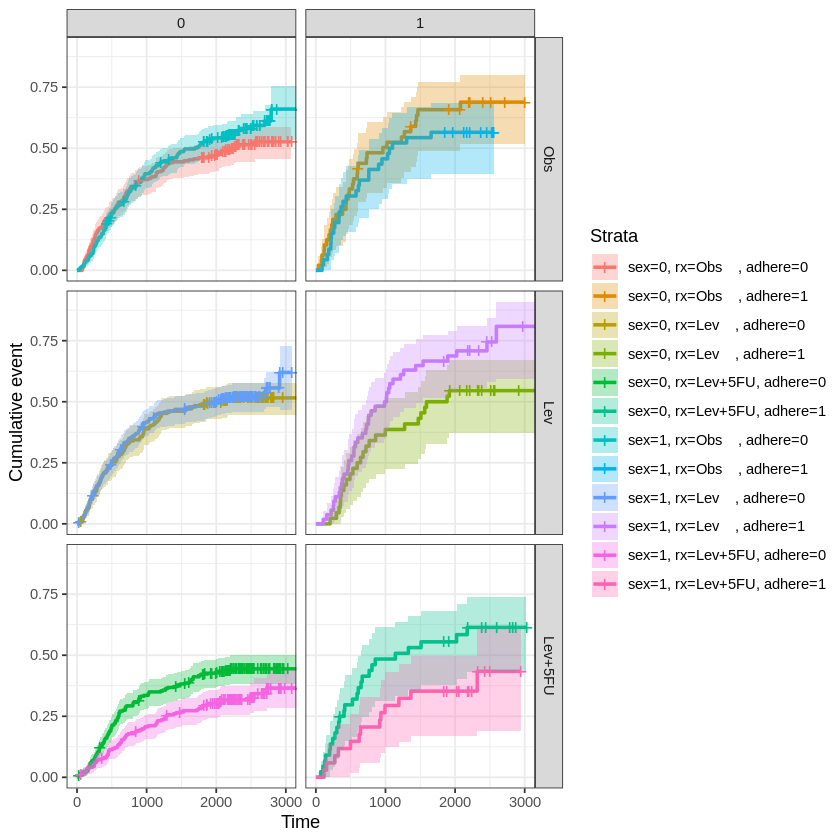

In [18]:
# Plot survival curves by sex and facet by rx and adhere
ggsurv <- ggsurvplot(fit2, fun = "event", conf.int = TRUE,
                     ggtheme = theme_bw())
   
ggsurv$plot +theme_bw() + 
  theme (legend.position = "right")+
  facet_grid(rx ~ adhere)

**Summary**

Survival analysis is a set of statistical approaches for data analysis where the outcome variable of interest is time until an event occurs.

Survival data are generally described and modeled in terms of two related functions:

the survivor function representing the probability that an individual survives from the time of origin to some time beyond time t. It’s usually estimated by the Kaplan-Meier method. The logrank test may be used to test for differences between survival curves for groups, such as treatment arms.

The hazard function gives the instantaneous potential of having an event at a time, given survival up to that time. It is used primarily as a diagnostic tool or for specifying a mathematical model for survival analysis.

